In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blip1epoch/pytorch/default/1/blip-lora-vqa/adapter_model.safetensors
/kaggle/input/blip1epoch/pytorch/default/1/blip-lora-vqa/adapter_config.json
/kaggle/input/blip1epoch/pytorch/default/1/blip-lora-vqa/README.md
/kaggle/input/blip-epoch-10/pytorch/default/1/blip-saved-model/config.json
/kaggle/input/blip-epoch-10/pytorch/default/1/blip-saved-model/model.safetensors
/kaggle/input/blip-epoch-10/pytorch/default/1/blip-saved-model/generation_config.json
/kaggle/input/fine_tune_param/pytorch/default/1/adapter_model.safetensors
/kaggle/input/fine_tune_param/pytorch/default/1/adapter_config.json
/kaggle/input/fine_tune_param/pytorch/default/1/README.md
/kaggle/input/fine_tune_param/pytorch/default/1/blip-lora-vqa/adapter_model.safetensors
/kaggle/input/fine_tune_param/pytorch/default/1/blip-lora-vqa/adapter_config.json
/kaggle/input/fine_tune_param/pytorch/default/1/blip-lora-vqa/README.md
/kaggle/input/10epochs/pytorch/default/1/adapter_model.safetensors
/kaggle/input/10epochs

 #  Loading test data

In [ ]:
!ls /kaggle/input/
!ls /kaggle/working/

In [7]:
!wget https://amazon-berkeley-objects.s3.amazonaws.com/archives/abo-images-small.tar
!tar -xf abo-images-small.tar
!rm abo-images-small.tar

--2025-05-18 13:06:42--  https://amazon-berkeley-objects.s3.amazonaws.com/archives/abo-images-small.tar
Resolving amazon-berkeley-objects.s3.amazonaws.com (amazon-berkeley-objects.s3.amazonaws.com)... 16.182.99.201, 54.231.199.105, 3.5.17.152, ...
Connecting to amazon-berkeley-objects.s3.amazonaws.com (amazon-berkeley-objects.s3.amazonaws.com)|16.182.99.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3253381120 (3.0G) [application/x-tar]
Saving to: ‘abo-images-small.tar’

abo-images-small.ta 100%[===================>]   3.03G  12.3MB/s    in 3m 58s  

2025-05-18 13:10:41 (13.0 MB/s) - ‘abo-images-small.tar’ saved [3253381120/3253381120]



In [ ]:
from pathlib import Path

dataset_path = Path("/kaggle/working/")

img_path = dataset_path / "images/small/24/2447e80d.jpg"
print(img_path.exists())

True


In [ ]:
import cv2
img = cv2.imread(dataset_path / "images/small/ec/ec8e1726.jpg")

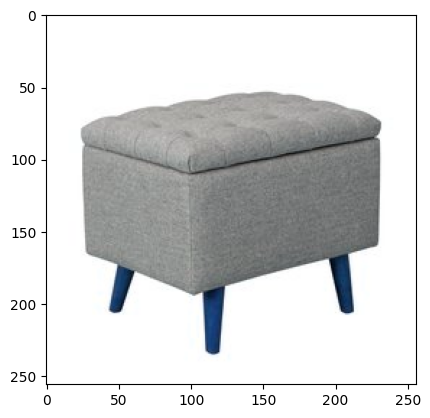

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
!pip install transformers accelerate
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [8]:
import json

with open("/content/test.json", "r") as f:
    questions_data = json.load(f)

In [9]:
from pathlib import Path

image_root = Path("/content/images/small")

# **Baseline models**

# **1. BLIP**

In [ ]:
# Used a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("visual-question-answering", model="Salesforce/blip-vqa-base")

2025-05-18 11:04:11.191804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747566251.416138      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747566251.480877      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [ ]:
from PIL import Image
from tqdm import tqdm

predictions = []


for img_path, qas in tqdm(list(questions_data.items())):
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        ground_truth = qa["answer"]
        question = qa["question"] + " Answer with only one word."

        output = pipe(image, question)
        split_words = output[0]['answer'].strip().split()
        if len(split_words):
            predicted_answer = split_words[0]  # Take only the first word
        else:
            predicted_answer = ''

        predictions.append({
            "question": question,
            "ground_truth": ground_truth.lower(),
            "prediction": predicted_answer.lower()
        })


100%|██████████| 2067/2067 [09:42<00:00,  3.55it/s]


**exact matching score**

In [ ]:
exact_matches = 0
total = len(predictions)

for pred in predictions:
    reference = pred["ground_truth"].lower().strip()
    hypothesis = pred["prediction"].lower().strip()

    if reference == hypothesis:
        exact_matches += 1

exact_match_acc = exact_matches / total
print(f"Exact Match Accuracy: {exact_match_acc * 100:.2f}%")

Exact Match Accuracy: 49.53%


**METEOR score**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.translate.meteor_score import single_meteor_score
from nltk.tokenize import word_tokenize

preds = [item["prediction"] for item in predictions]
gts = [item["ground_truth"] for item in predictions]

meteor_scores = [
    single_meteor_score(word_tokenize(gt), word_tokenize(pred))
    for gt, pred in zip(gts, preds)
]

average_meteor = sum(meteor_scores) / len(meteor_scores)
print(f"Average METEOR score: {average_meteor:.4f}")

Average METEOR score: 0.2636


**BERTScore**

In [ ]:
from bert_score import score

preds = [item["prediction"] for item in predictions]
gts = [item["ground_truth"].lower() for item in predictions]

P, R, F1 = score(preds, gts, lang="en", verbose=True)

print(f"Average BERTScore F1: {F1.mean().item():.4f}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/17 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/109 [00:00<?, ?it/s]

done in 2.86 seconds, 2427.10 sentences/sec
Average BERTScore F1: 0.9792


**BLEU Score**

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

smoothie = SmoothingFunction().method4

bleu_scores = []

for item in predictions:
    reference = word_tokenize(item["ground_truth"].lower())
    hypothesis = word_tokenize(item["prediction"].lower())

    # BLEU score expects a list of references, each being a list of tokens
    score = sentence_bleu([reference], hypothesis, smoothing_function=smoothie)
    bleu_scores.append(score)

average_bleu = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU Score: {average_bleu:.4f}")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average BLEU Score: 0.4953


In [ ]:
for i, item in enumerate(predictions):
    item["bert_f1"] = F1[i].item()

predictions_sorted = sorted(predictions, key=lambda x: x["bert_f1"])

for item in predictions_sorted[:20]:
    print(f"Question: {item['question']}")
    print(f"Ground Truth: {item['ground_truth']}")
    print(f"Prediction: {item['prediction']}")
    print(f"BERT F1: {item['bert_f1']:.4f}")
    print("-" * 50)


# Vilt Baseline

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import torch
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa").to(device)
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/470M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
predictions = []

for img_path, qas in tqdm(list(questions_data.items())):
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        question = qa["question"]
        ground_truth = qa["answer"]

        # Preprocess inputs
        encoding = processor(image, question, return_tensors="pt").to(device)

        # Forward pass
        outputs = model(**encoding)
        logits = outputs.logits

        # Get the predicted answer
        predicted_idx = logits.argmax(-1).item()
        predicted_answer = model.config.id2label[predicted_idx]

        predictions.append({
            "question": question,
            "ground_truth": ground_truth,
            "prediction": predicted_answer
        })


100%|██████████| 2067/2067 [02:50<00:00, 12.16it/s]


**Bert score**

In [ ]:
from bert_score import score

preds = [item["prediction"] for item in predictions]
gts = [item["ground_truth"].lower() for item in predictions]

P, R, F1 = score(preds, gts, lang="en", verbose=True)

print(f"Average BERTScore F1: {F1.mean().item():.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/16 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/109 [00:00<?, ?it/s]

done in 2.10 seconds, 3299.44 sentences/sec
Average BERTScore F1: 0.9771


**exact match score**

In [ ]:
correct = 0
total = 0

for item in predictions:
    pred = item["prediction"].strip().lower()
    gt = item["ground_truth"].strip().lower()

    if pred == gt:
        correct += 1
    total += 1

accuracy = correct / total
print(f"Exact Match Accuracy: {accuracy*100:.2f}%")


Exact Match Accuracy: 47.10%


****BLEU and METEOR Score****

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from nltk.translate.meteor_score import single_meteor_score
from nltk.tokenize import word_tokenize


import numpy as np

# Optional for BLEU smoothing
smoother = SmoothingFunction().method4

bleu_scores = []

for item in predictions:
    reference = [item["ground_truth"].lower().split()]  # BLEU expects list of references
    candidate = item["prediction"].lower().split()

    # BLEU Score (BLEU-1 to BLEU-4)
    bleu = sentence_bleu(reference, candidate, smoothing_function=smoother)
    bleu_scores.append(bleu)

# Final average scores
avg_bleu = np.mean(bleu_scores)
print(f"\nAverage BLEU Score: {avg_bleu:.4f}")



preds = [item["prediction"] for item in predictions]
gts = [item["ground_truth"] for item in predictions]

meteor_scores = [
    single_meteor_score(word_tokenize(gt), word_tokenize(pred))
    for gt, pred in zip(gts, preds)
]

average_meteor = sum(meteor_scores) / len(meteor_scores)
print(f"Average METEOR score: {average_meteor:.4f}")



Average BLEU Score: 0.4714
Average METEOR score: 0.2528


In [ ]:
for i, pred in enumerate(predictions):
    print(f"Example {i+1}:")
    print(f"Question       : {pred['question']}")
    print(f"Ground Truth   : {pred['ground_truth']}")
    print(f"Prediction     : {pred['prediction']}")
    print("-" * 50)


# **Evaluating fine-tuned blip model**

In [12]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from transformers import BlipForQuestionAnswering, BlipProcessor
from peft import PeftModel, PeftConfig
import torch
from tqdm import tqdm
import torch.nn.functional as F

# Load processor and base model
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
base_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

peft_model = PeftModel.from_pretrained(base_model, "./lora_adapter")
peft_model.eval()
peft_model.to(device)

PeftModel(
  (base_model): LoraModel(
    (model): BlipForQuestionAnswering(
      (vision_model): BlipVisionModel(
        (embeddings): BlipVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (encoder): BlipEncoder(
          (layers): ModuleList(
            (0-11): 12 x BlipEncoderLayer(
              (self_attn): BlipAttention(
                (dropout): Dropout(p=0.0, inplace=False)
                (qkv): Linear(in_features=768, out_features=2304, bias=True)
                (projection): Linear(in_features=768, out_features=768, bias=True)
              )
              (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (mlp): BlipMLP(
                (activation_fn): GELUActivation()
                (fc1): Linear(in_features=768, out_features=3072, bias=True)
                (fc2): Linear(in_features=3072, out_features=768, bias=True)
              )
              (layer_norm2): Lay

In [13]:
from PIL import Image
from tqdm import tqdm

predictions = []
total_time =0

for img_path, qas in tqdm(list(questions_data.items())):
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        question = qa["question"]
        ground_truth = qa["answer"]

        # Preprocess and move to device
        inputs = processor(image, question, return_tensors="pt").to(device)

         # Measure inference time
        start = time.time()
        generated_ids = peft_model.generate(**inputs)
        end = time.time()

        total_time += (end - start)



        predicted_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        predictions.append({
            "question": question,
            "ground_truth": ground_truth,
            "prediction": predicted_answer
        })
print(f"Average Inference Time: {total_time / total:.3f} seconds/image")


100%|██████████| 2067/2067 [11:58<00:00,  2.88it/s]

Average Inference Time: 0.095 seconds/image


In [22]:
from PIL import Image
from tqdm import tqdm

predictions = []
total_time =0

for img_path, qas in tqdm(list(questions_data.items())[:300]):
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        question = qa["question"]
        ground_truth = qa["answer"]

        # Preprocess and move to device
        inputs = processor(image, question, return_tensors="pt").to(device)

         # Measure inference time
        start = time.time()
        generated_ids = peft_model.generate(**inputs)
        end = time.time()

        total_time += (end - start)



        predicted_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        predictions.append({
            "question": question,
            "ground_truth": ground_truth,
            "prediction": predicted_answer
        })
print(f"Average Inference Time: {total_time / 100:.3f} seconds/image")


100%|██████████| 300/300 [01:45<00:00,  2.85it/s]

Average Inference Time: 0.994 seconds/image


In [23]:
print(f"Average Inference Time: {total_time / 300:.3f} seconds/image")


Average Inference Time: 0.331 seconds/image


**Exact matching score**

In [ ]:
exact_matches = 0
total = len(predictions)

for pred in predictions:
    reference = pred["ground_truth"].lower().strip()
    hypothesis = pred["prediction"].lower().strip()

    if reference == hypothesis:
        exact_matches += 1

exact_match_acc = exact_matches / total
print(f"Exact Match Accuracy: {exact_match_acc * 100:.2f}%")


Exact Match Accuracy: 77.75%


**Bertscore**

In [ ]:
!pip install evaluate transformers --quiet

import evaluate

# Load bertscore metric
bertscore = evaluate.load("bertscore")

# Prepare lists of predictions and references
preds = [pred["prediction"] for pred in predictions]
refs = [pred["ground_truth"] for pred in predictions]

# Compute BERTScore (using a base model like roberta-large)
results = bertscore.compute(predictions=preds, references=refs, lang="en")

# Print average BERTScore F1
average_f1 = sum(results["f1"]) / len(results["f1"])
print(f"Average BERTScore F1: {average_f1:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.0 MB/s eta 0:00:00ta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average BERTScore F1: 0.9753


**BLEU and METEOR score**

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
import numpy as np

smoother = SmoothingFunction().method4

bleu_scores = []
meteor_scores = []

for item in predictions:
    reference = [item["ground_truth"].lower().split()]
    candidate = item["prediction"].lower().split()

    # Compute BLEU score
    bleu = sentence_bleu(reference, candidate, smoothing_function=smoother)
    bleu_scores.append(bleu)

# Aggregate results
avg_bleu = np.mean(bleu_scores)
print(f"\nAverage BLEU Score: {avg_bleu:.4f}")



preds = [item["prediction"] for item in predictions]
gts = [item["ground_truth"] for item in predictions]

meteor_scores = [
    single_meteor_score(word_tokenize(gt), word_tokenize(pred))
    for gt, pred in zip(gts, preds)
]

average_meteor = sum(meteor_scores) / len(meteor_scores)
print(f"Average METEOR score: {average_meteor:.4f}")



Average BLEU Score: 0.7791
Average METEOR score: 0.3933


**MAP**

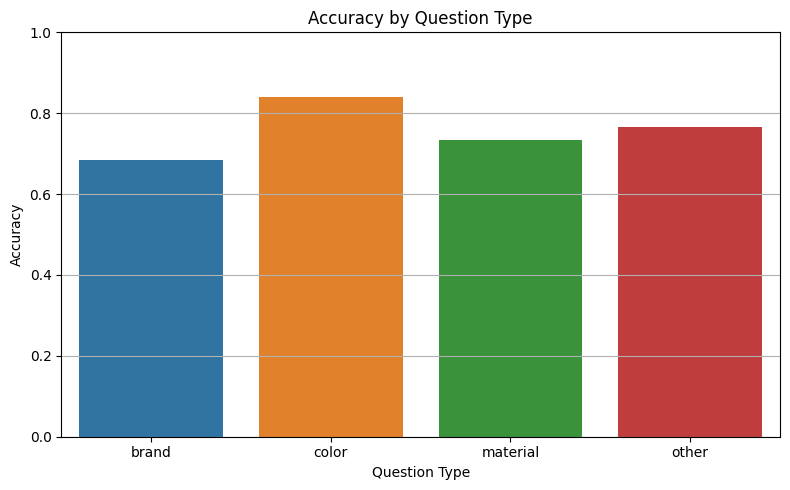

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(predictions)

def get_question_type(question):
    if "color" in question.lower():
        return "color"
    elif "material" in question.lower():
        return "material"
    elif "brand" in question.lower():
        return "brand"
    elif "category" in question.lower():
        return "category"
    else:
        return "other"

df["type"] = df["question"].apply(get_question_type)
df["correct"] = df["prediction"].str.strip().str.lower() == df["ground_truth"].str.strip().str.lower()

# Accuracy by type
accuracy_by_type = df.groupby("type")["correct"].mean().reset_index()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.barplot(x="type", y="correct", data=accuracy_by_type)
plt.title("Accuracy by Question Type")
plt.ylabel("Accuracy")
plt.xlabel("Question Type")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Evaluating fine-tuning blip model - config 2**

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from transformers import BlipForQuestionAnswering, BlipProcessor
from peft import PeftModel, PeftConfig
import torch
from tqdm import tqdm
import torch.nn.functional as F

# Load processor and base model
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
base_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

# Load LoRA config and wrap model
peft_model = PeftModel.from_pretrained(base_model, "/kaggle/input/fine_tune_param/pytorch/default/1")
peft_model.eval()
peft_model.to(device)

PeftModel(
  (base_model): LoraModel(
    (model): BlipForQuestionAnswering(
      (vision_model): BlipVisionModel(
        (embeddings): BlipVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (encoder): BlipEncoder(
          (layers): ModuleList(
            (0-11): 12 x BlipEncoderLayer(
              (self_attn): BlipAttention(
                (dropout): Dropout(p=0.0, inplace=False)
                (qkv): Linear(in_features=768, out_features=2304, bias=True)
                (projection): Linear(in_features=768, out_features=768, bias=True)
              )
              (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (mlp): BlipMLP(
                (activation_fn): GELUActivation()
                (fc1): Linear(in_features=768, out_features=3072, bias=True)
                (fc2): Linear(in_features=3072, out_features=768, bias=True)
              )
              (layer_norm2): Lay

In [ ]:
from PIL import Image
from tqdm import tqdm
predictions = []

for img_path, qas in tqdm(list(questions_data.items())):
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        question = qa["question"]
        ground_truth = qa["answer"]

        # Preprocess and move to device
        inputs = processor(image, question, return_tensors="pt").to(device)

         # Measure inference time
        # start = time.time()
        generated_ids = peft_model.generate(**inputs)
        # end = time.time()

        # total_time += (end - start)



        predicted_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        predictions.append({
            "question": question,
            "ground_truth": ground_truth,
            "prediction": predicted_answer
        })
print(f"Average Inference Time: {total_time / total:.3f} seconds/image")


100%|██████████| 2067/2067 [11:16<00:00,  3.05it/s]


**Exact matching score**

In [ ]:
exact_matches = 0
total = len(predictions)

for pred in predictions:
    reference = pred["ground_truth"].lower().strip()
    hypothesis = pred["prediction"].lower().strip()

    if reference == hypothesis:
        exact_matches += 1

exact_match_acc = exact_matches / total
print(f"Exact Match Accuracy: {exact_match_acc * 100:.2f}%")


Exact Match Accuracy: 77.91%


**Bertscore**

In [ ]:
!pip install evaluate transformers --quiet

import evaluate

# Load bertscore metric
bertscore = evaluate.load("bertscore")

# Prepare lists of predictions and references
preds = [pred["prediction"] for pred in predictions]
refs = [pred["ground_truth"] for pred in predictions]

# Compute BERTScore (using a base model like roberta-large)
results = bertscore.compute(predictions=preds, references=refs, lang="en")

# Print average BERTScore F1
average_f1 = sum(results["f1"]) / len(results["f1"])
print(f"Average BERTScore F1: {average_f1:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average BERTScore F1: 0.9753


**BLEU and METEOR score**

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
import numpy as np

smoother = SmoothingFunction().method4

bleu_scores = []
meteor_scores = []

for item in predictions:
    reference = [item["ground_truth"].lower().split()]  # List of reference tokens
    candidate = item["prediction"].lower().split()      # Predicted tokens

    # Compute BLEU score
    bleu = sentence_bleu(reference, candidate, smoothing_function=smoother)
    bleu_scores.append(bleu)

# Aggregate results
avg_bleu = np.mean(bleu_scores)
print(f"\nAverage BLEU Score: {avg_bleu:.4f}")



preds = [item["prediction"] for item in predictions]
gts = [item["ground_truth"] for item in predictions]

meteor_scores = [
    single_meteor_score(word_tokenize(gt), word_tokenize(pred))
    for gt, pred in zip(gts, preds)
]

average_meteor = sum(meteor_scores) / len(meteor_scores)
print(f"Average METEOR score: {average_meteor:.4f}")



Average BLEU Score: 0.7791
Average METEOR score: 0.3933


**MAP**

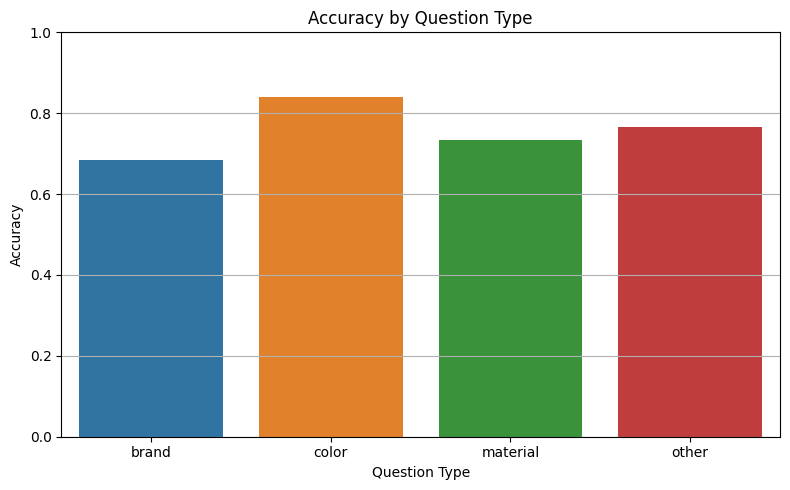

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(predictions)

def get_question_type(question):
    if "color" in question.lower():
        return "color"
    elif "material" in question.lower():
        return "material"
    elif "brand" in question.lower():
        return "brand"
    elif "category" in question.lower():
        return "category"
    else:
        return "other"

df["type"] = df["question"].apply(get_question_type)
df["correct"] = df["prediction"].str.strip().str.lower() == df["ground_truth"].str.strip().str.lower()

# Accuracy by type
accuracy_by_type = df.groupby("type")["correct"].mean().reset_index()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.barplot(x="type", y="correct", data=accuracy_by_type)
plt.title("Accuracy by Question Type")
plt.ylabel("Accuracy")
plt.xlabel("Question Type")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Evaluating fine-tuning blip model - hyperparameter**

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from transformers import BlipForQuestionAnswering, BlipProcessor
from peft import PeftModel, PeftConfig
import torch
from tqdm import tqdm
import torch.nn.functional as F

# Load processor and base model
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
base_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

# Load LoRA config and wrap model
peft_model = PeftModel.from_pretrained(base_model, "/kaggle/input/5epochyper/pytorch/default/1")
peft_model.eval()
peft_model.to(device)

PeftModel(
  (base_model): LoraModel(
    (model): BlipForQuestionAnswering(
      (vision_model): BlipVisionModel(
        (embeddings): BlipVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (encoder): BlipEncoder(
          (layers): ModuleList(
            (0-11): 12 x BlipEncoderLayer(
              (self_attn): BlipAttention(
                (dropout): Dropout(p=0.0, inplace=False)
                (qkv): Linear(in_features=768, out_features=2304, bias=True)
                (projection): Linear(in_features=768, out_features=768, bias=True)
              )
              (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (mlp): BlipMLP(
                (activation_fn): GELUActivation()
                (fc1): Linear(in_features=768, out_features=3072, bias=True)
                (fc2): Linear(in_features=3072, out_features=768, bias=True)
              )
              (layer_norm2): Lay

In [ ]:
from PIL import Image
from tqdm import tqdm
predictions = []

for img_path, qas in tqdm(list(questions_data.items())):
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        question = qa["question"]
        ground_truth = qa["answer"]

        # Preprocess and move to device
        inputs = processor(image, question, return_tensors="pt").to(device)

         # Measure inference time
        # start = time.time()
        generated_ids = peft_model.generate(**inputs)
        # end = time.time()

        # total_time += (end - start)



        predicted_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        predictions.append({
            "question": question,
            "ground_truth": ground_truth,
            "prediction": predicted_answer
        })
# print(f"Average Inference Time: {total_time / total:.3f} seconds/image")


100%|██████████| 2067/2067 [11:18<00:00,  3.05it/s]


**Exact matching score**

In [ ]:
exact_matches = 0
total = len(predictions)

for pred in predictions:
    reference = pred["ground_truth"].lower().strip()
    hypothesis = pred["prediction"].lower().strip()

    if reference == hypothesis:
        exact_matches += 1

exact_match_acc = exact_matches / total
print(f"Exact Match Accuracy: {exact_match_acc * 100:.2f}%")


Exact Match Accuracy: 77.58%


**Bertscore**

In [ ]:
!pip install evaluate transformers --quiet

import evaluate

# Load bertscore metric
bertscore = evaluate.load("bertscore")

# Prepare lists of predictions and references
preds = [pred["prediction"] for pred in predictions]
refs = [pred["ground_truth"] for pred in predictions]

# Compute BERTScore (using a base model like roberta-large)
results = bertscore.compute(predictions=preds, references=refs, lang="en")

# Print average BERTScore F1
average_f1 = sum(results["f1"]) / len(results["f1"])
print(f"Average BERTScore F1: {average_f1:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average BERTScore F1: 0.9753


**BLEU and METEOR score**

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
import numpy as np

smoother = SmoothingFunction().method4

bleu_scores = []
meteor_scores = []

for item in predictions:
    reference = [item["ground_truth"].lower().split()]  # List of reference tokens
    candidate = item["prediction"].lower().split()      # Predicted tokens

    # Compute BLEU score
    bleu = sentence_bleu(reference, candidate, smoothing_function=smoother)
    bleu_scores.append(bleu)

# Aggregate results
avg_bleu = np.mean(bleu_scores)
print(f"\nAverage BLEU Score: {avg_bleu:.4f}")



preds = [item["prediction"] for item in predictions]
gts = [item["ground_truth"] for item in predictions]

meteor_scores = [
    single_meteor_score(word_tokenize(gt), word_tokenize(pred))
    for gt, pred in zip(gts, preds)
]

average_meteor = sum(meteor_scores) / len(meteor_scores)
print(f"Average METEOR score: {average_meteor:.4f}")



Average BLEU Score: 0.7758
Average METEOR score: 0.3921


**MAP**

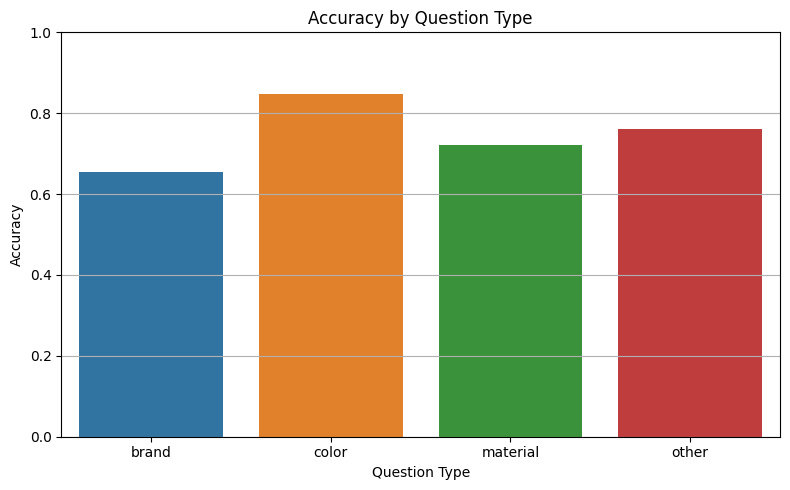

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(predictions)

def get_question_type(question):
    if "color" in question.lower():
        return "color"
    elif "material" in question.lower():
        return "material"
    elif "brand" in question.lower():
        return "brand"
    elif "category" in question.lower():
        return "category"
    else:
        return "other"

df["type"] = df["question"].apply(get_question_type)
df["correct"] = df["prediction"].str.strip().str.lower() == df["ground_truth"].str.strip().str.lower()

accuracy_by_type = df.groupby("type")["correct"].mean().reset_index()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.barplot(x="type", y="correct", data=accuracy_by_type)
plt.title("Accuracy by Question Type")
plt.ylabel("Accuracy")
plt.xlabel("Question Type")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Quantization**

In [ ]:
!pip install -q bitsandbytes accelerate transformers peft
!pip install -U bitsandbytes transformers accelerate


In [ ]:
pip install -U bitsandbytes

In [ ]:
!unzip blip-lora-vqa.zip -d lora_adapter


Archive:  blip-lora-vqa.zip
  inflating: lora_adapter/README.md  
  inflating: lora_adapter/adapter_config.json  
  inflating: lora_adapter/adapter_model.safetensors  


In [15]:
import torch
from transformers import BlipProcessor, BlipForQuestionAnswering, BitsAndBytesConfig
from peft import PeftModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Quantization config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

# Load processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
base_model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base",
    quantization_config=bnb_config,
    device_map="auto"
)

# Load LoRA weights
peft_model = PeftModel.from_pretrained(
    base_model,
    "./lora_adapter"  # <-- Replace with your path
).to(device)

peft_model.eval()


PeftModel(
  (base_model): LoraModel(
    (model): BlipForQuestionAnswering(
      (vision_model): BlipVisionModel(
        (embeddings): BlipVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (encoder): BlipEncoder(
          (layers): ModuleList(
            (0-11): 12 x BlipEncoderLayer(
              (self_attn): BlipAttention(
                (dropout): Dropout(p=0.0, inplace=False)
                (qkv): Linear4bit(in_features=768, out_features=2304, bias=True)
                (projection): Linear4bit(in_features=768, out_features=768, bias=True)
              )
              (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (mlp): BlipMLP(
                (activation_fn): GELUActivation()
                (fc1): Linear4bit(in_features=768, out_features=3072, bias=True)
                (fc2): Linear4bit(in_features=3072, out_features=768, bias=True)
              )
              (l

In [21]:
import time
from PIL import Image
from tqdm import tqdm

predictions = []
total_time = 0
correct = 0
total = 0

for img_path, qas in tqdm(list(questions_data.items())[:300]):  # modify slice if needed
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        question = qa["question"]
        ground_truth = qa["answer"].strip().lower()

        # Preprocess
        inputs = processor(image, question, return_tensors="pt").to(device)

        # Measure inference time
        start = time.time()
        generated_ids = peft_model.generate(**inputs)
        end = time.time()

        total_time += (end - start)

        predicted_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip().lower()


        predictions.append({
            "question": question,
            "ground_truth": ground_truth,
            "prediction": predicted_answer
        })

print(f" Average Inference Time: {total_time / 100:.3f} seconds/image")




100%|██████████| 300/300 [01:47<00:00,  2.80it/s]

 Average Inference Time: 1.013 seconds/image


In [10]:
import time
from PIL import Image
from tqdm import tqdm

predictions = []
total_time = 0
correct = 0
total = 0

for img_path, qas in tqdm(list(questions_data.items())):  # modify slice if needed
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        question = qa["question"]
        ground_truth = qa["answer"].strip().lower()

        # Preprocess
        inputs = processor(image, question, return_tensors="pt").to(device)

        # Measure inference time
        start = time.time()
        generated_ids = peft_model.generate(**inputs)
        end = time.time()

        total_time += (end - start)

        predicted_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip().lower()

        if predicted_answer == ground_truth:
            correct += 1
        total += 1

        predictions.append({
            "question": question,
            "ground_truth": ground_truth,
            "prediction": predicted_answer
        })

print(f"\n Accuracy: {correct}/{total} = {correct / total * 100:.2f}%")
print(f" Average Inference Time: {total_time / total:.3f} seconds/image")


100%|██████████| 2067/2067 [20:25<00:00,  1.69it/s]


 Accuracy: 5380/6945 = 77.47%
 Average Inference Time: 0.167 seconds/image


**KV caching**

In [11]:
predictions = []
total_time = 0
correct = 0
total = 0

for img_path, qas in tqdm(list(questions_data.items())):  # adjust range as needed
    full_img_path = image_root / Path(img_path).relative_to("images/small")
    image = Image.open(full_img_path).convert("RGB")

    for qa in qas:
        question = qa["question"]
        ground_truth = qa["answer"].strip().lower()

        # Preprocess
        inputs = processor(image, question, return_tensors="pt").to(device)

        # Run inference with KV caching
        with torch.no_grad():
            start = time.time()
            generated_ids = peft_model.generate(
                **inputs,
                use_cache=True  # KV Cache enabled here
            )
            end = time.time()

        total_time += (end - start)

        predicted_answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip().lower()

        if predicted_answer == ground_truth:
            correct += 1
        total += 1

        predictions.append({
            "question": question,
            "ground_truth": ground_truth,
            "prediction": predicted_answer
        })

print(f"\n Accuracy: {correct}/{total} = {correct / total * 100:.2f}%")
print(f" Average Inference Time: {total_time / total:.3f} seconds/image")


100%|██████████| 2067/2067 [20:42<00:00,  1.66it/s]


 Accuracy: 5380/6945 = 77.47%
 Average Inference Time: 0.170 seconds/image
